# ***Assignment 3***

***Importing files.***

In [ ]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sma
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

***2. Load the dataset into the tool. ***

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from google.colab import files
 
 
uploaded = files.upload()

Saving abalone.csv to abalone.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['abalone.csv']))
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


***3. Perform Below Visualizations.***
 
     1. Univariate Analysis

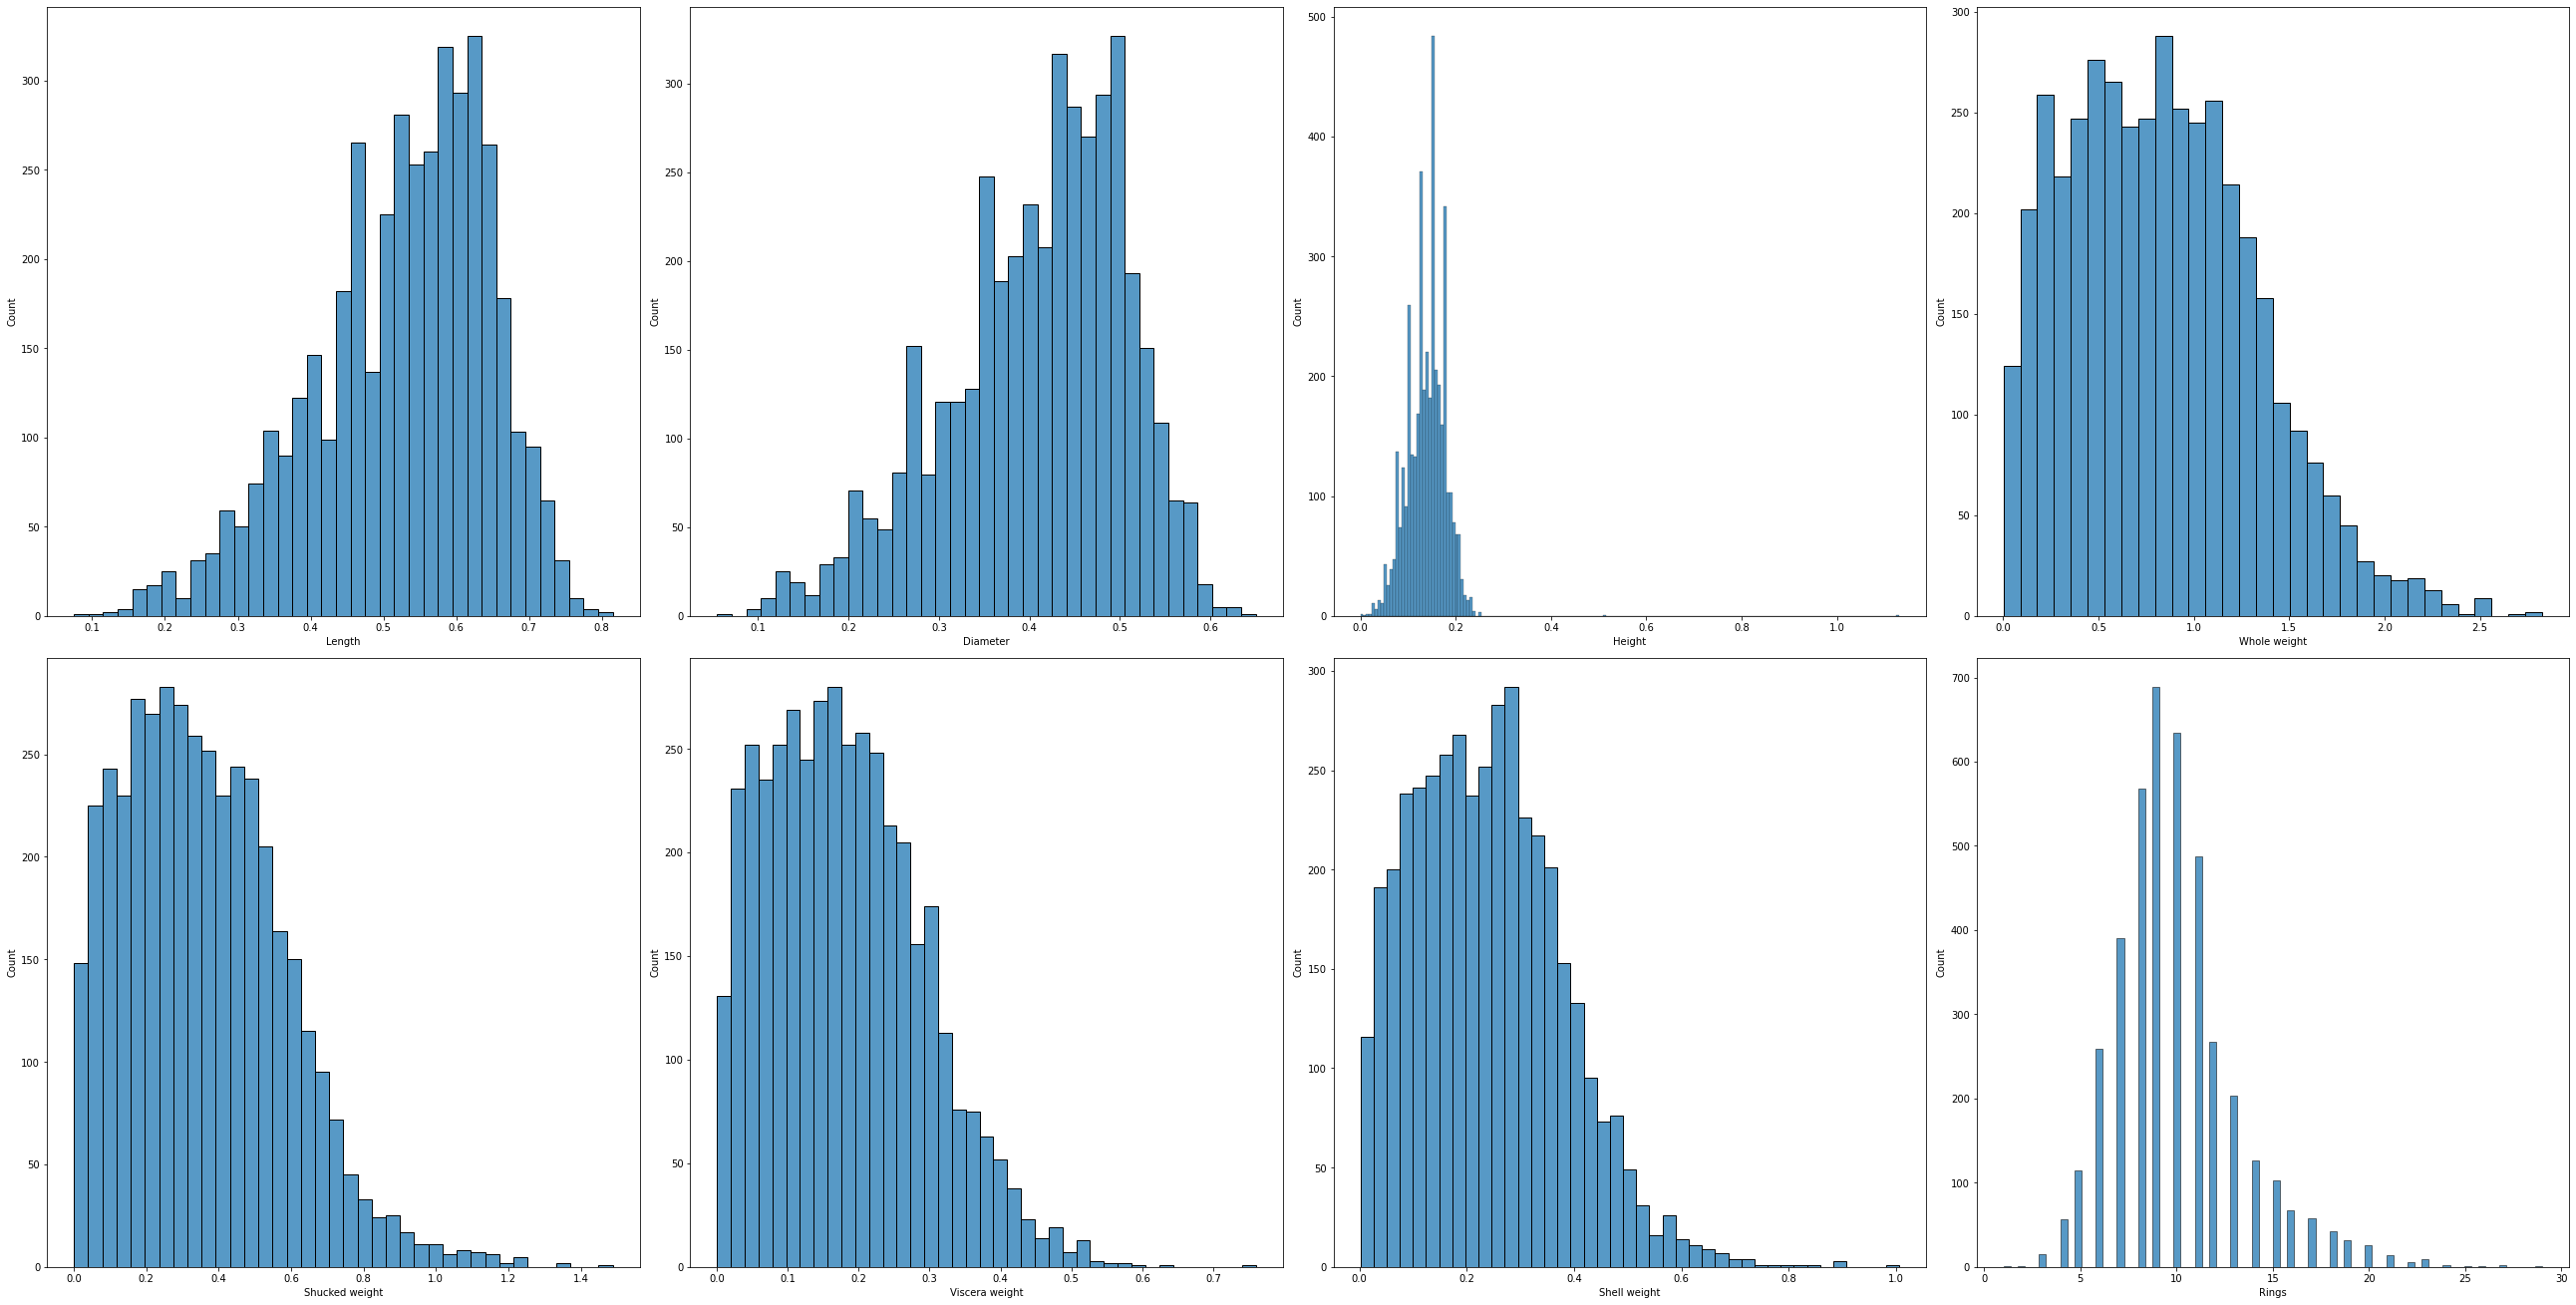

In [ ]:
c = 4
r = 4
num_cols = df.select_dtypes(exclude='object').columns
fig = plt.figure( figsize=(c*9, r*9))
for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot(r,c,i+1)
    
    sns.histplot(x = df[col], ax = ax)
    
fig.tight_layout()  
plt.show()

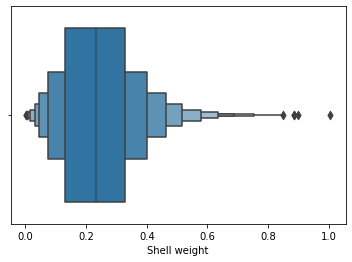

In [ ]:
sns.boxenplot(x=df["Shell weight"])

2. Bi-Variate Analysis

Text(0, 0.5, 'Length')

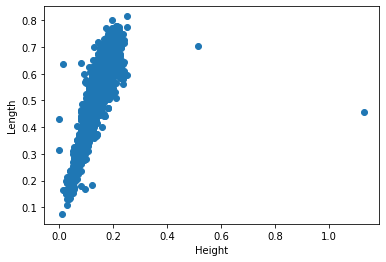

In [ ]:
plt.scatter(df.Height,df.Length)
plt.xlabel('Height')
plt.ylabel('Length')

In [ ]:
3. Multi-Variate Analysis

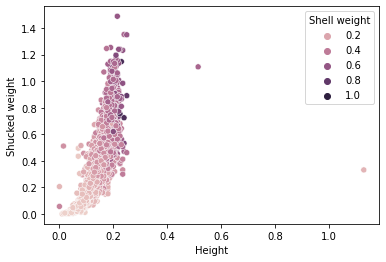

In [ ]:
sns.scatterplot(df['Height'], df['Shucked weight'], hue = df['Shell weight'])

*** 4. Perform descriptive statistics on the dataset.***

In [ ]:
df.mean()

Length            0.523992
Diameter          0.407881
Height            0.139516
Whole weight      0.828742
Shucked weight    0.359367
Viscera weight    0.180594
Shell weight      0.238831
Rings             9.933684
dtype: float64

In [ ]:
df.median()

Length            0.5450
Diameter          0.4250
Height            0.1400
Whole weight      0.7995
Shucked weight    0.3360
Viscera weight    0.1710
Shell weight      0.2340
Rings             9.0000
dtype: float64

In [ ]:
df.mode()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.550,0.45,0.15,0.2225,0.175,0.1715,0.275,9.0
1,NaN,0.625,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.std()

Length            0.120093
Diameter          0.099240
Height            0.041827
Whole weight      0.490389
Shucked weight    0.221963
Viscera weight    0.109614
Shell weight      0.139203
Rings             3.224169
dtype: float64

In [ ]:
data=pd.DataFrame(df)
print (data)

      Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0       2   0.455     0.365   0.095        0.5140          0.2245   
1       2   0.350     0.265   0.090        0.2255          0.0995   
2       0   0.530     0.420   0.135        0.6770          0.2565   
3       2   0.440     0.365   0.125        0.5160          0.2155   
4       1   0.330     0.255   0.080        0.2050          0.0895   
...   ...     ...       ...     ...           ...             ...   
4172    0   0.565     0.450   0.165        0.8870          0.3700   
4173    2   0.590     0.440   0.135        0.9660          0.4390   
4174    2   0.600     0.475   0.205        1.1760          0.5255   
4175    0   0.625     0.485   0.150        1.0945          0.5310   
4176    2   0.710     0.555   0.195        1.9485          0.9455   

      Viscera weight  Shell weight  Rings  
0             0.1010        0.1500     15  
1             0.0485        0.0700      7  
2             0.1415        0.2100     

In [ ]:
print(data.sum())

Sex                4398.0000
Length             2188.7150
Diameter           1703.7200
Height              582.7600
Whole weight       3461.6560
Shucked weight     1501.0780
Viscera weight      754.3395
Shell weight        997.5965
Rings             41493.0000
dtype: float64


In [ ]:
print(data.sum(1))

0       18.9045
1       10.1485
2       11.3700
3       13.9305
4        9.0540
         ...   
4172    13.9250
4173    15.0450
4174    14.5770
4175    13.4425
4176    19.2255
Length: 4177, dtype: float64


***5. Check for Missing values and deal with them.***

In [ ]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

***6. Find the outliers and replace the outliers***

In [ ]:
print(df['Shell weight'].skew())
df['Shell weight'].describe()

0.6209268251392077


count    4177.000000
mean        0.238831
std         0.139203
min         0.001500
25%         0.130000
50%         0.234000
75%         0.329000
max         1.005000
Name: Shell weight, dtype: float64

In [ ]:
print(df['Shell weight'].quantile(0.50)) 
print(df['Shell weight'].quantile(0.95)) 
df['Shell weight'] = np.where(df['Shell weight'] > 325, 140, df['Shell weight'])
df.describe()


0.234
0.48


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


***7. Check for Categorical columns and perform encoding***

In [ ]:
from sklearn.compose import make_column_selector as selector

categorical_columns_selector = selector(dtype_include=object)
categorical_columns = categorical_columns_selector(df)
categorical_columns

['Sex']

In [ ]:
data_categorical = df[categorical_columns]
data_categorical.head()

,Sex
0,M
1,M
2,F
3,M
4,I


In [ ]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

df['Sex']= label_encoder.fit_transform(df['Sex'])
df['Sex'].unique()

array([2, 0, 1])

***8. Split the data into dependent and independent variables***

In [ ]:
X= data.iloc[ : , :-1].values

y= data.iloc[ : , 4].values
print(X,y)

[[ 0.455  0.365  0.095 ... 15.     0.     0.   ]
 [ 0.35   0.265  0.09  ...  7.     0.     0.   ]
 [ 0.53   0.42   0.135 ...  9.     1.     0.   ]
 ...
 [ 0.6    0.475  0.205 ...  9.     0.     0.   ]
 [ 0.625  0.485  0.15  ... 10.     1.     0.   ]
 [ 0.71   0.555  0.195 ... 12.     0.     0.   ]] [0.2245 0.0995 0.2565 ... 0.5255 0.531  0.9455]


In [ ]:
from sklearn.model_selection import train_test_split

X= data['Whole weight']
y=data['Shucked weight']

# using the train test split function
X_train, X_test, y_train, y_test = train_test_split(
X,y , random_state=104,test_size=0.25, shuffle=True)

# printing out train and test sets

print('X_train : ')
print(X_train.head())
print(X_train.shape)

print('')
print('X_test : ')
print(X_test.head())
print(X_test.shape)

print('')
print('y_train : ')
print(y_train.head())
print(y_train.shape)

print('')
print('y_test : ')
print(y_test.head())
print(y_test.shape)

X_train : 
437     0.2520
1331    0.8730
1611    0.7625
1394    1.5210
396     0.7155
Name: Whole weight, dtype: float64
(3132,)

X_test : 
4087    0.9840
1699    1.4890
1868    0.6965
2984    1.2240
5       0.3515
Name: Whole weight, dtype: float64
(1045,)

y_train : 
437     0.0915
1331    0.3820
1611    0.3270
1394    0.6440
396     0.3165
Name: Shucked weight, dtype: float64
(3132,)

y_test : 
4087    0.4865
1699    0.7150
1868    0.3045
2984    0.6180
5       0.1410
Name: Shucked weight, dtype: float64
(1045,)


***9. Scale the independent variables***

In [ ]:
df_scaled =data.copy()
col_names = ['Shucked weight', 'Whole weight']
features = df_scaled[col_names]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled[col_names] = scaler.fit_transform(features.values)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(5, 10))

df_scaled[col_names] = scaler.fit_transform(features.values)
df_scaled

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,5.906676,5.751513,0.1010,0.1500,15,0,0,1
1,0.350,0.265,0.090,5.395785,5.331204,0.0485,0.0700,7,0,0,1
2,0.530,0.420,0.135,6.195325,5.859112,0.1415,0.2100,9,1,0,0
3,0.440,0.365,0.125,5.910218,5.721251,0.1140,0.1550,10,0,0,1
4,0.330,0.255,0.080,5.359483,5.297579,0.0395,0.0550,7,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,6.567204,6.240753,0.2390,0.2490,11,1,0,0
4173,0.590,0.440,0.135,6.707101,6.472764,0.2145,0.2605,10,0,0,1
4174,0.600,0.475,0.205,7.078980,6.763618,0.2875,0.3080,9,0,0,1
4175,0.625,0.485,0.150,6.934656,6.782112,0.2610,0.2960,10,1,0,0


***10. Split the data into training and testing***

In [ ]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
print(X_train, X_test, y_train, y_test)

      Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
1794   0.575     0.450   0.130        0.8145          0.4030          0.1715   
1466   0.515     0.425   0.145        0.9365          0.4970          0.1810   
2275   0.655     0.525   0.185        1.2590          0.4870          0.2215   
3929   0.650     0.515   0.215        1.4980          0.5640          0.3230   
1955   0.645     0.510   0.180        1.6195          0.7815          0.3220   
...      ...       ...     ...           ...             ...             ...   
2103   0.375     0.290   0.100        0.2760          0.1175          0.0565   
3603   0.420     0.325   0.110        0.3250          0.1245          0.0755   
3340   0.540     0.435   0.145        0.9700          0.4285          0.2200   
3064   0.635     0.500   0.180        1.1540          0.4405          0.2315   
3398   0.365     0.285   0.085        0.2205          0.0855          0.0515   

      Shell weight  Rings  Sex_F  Sex_I

In [ ]:
X_train.shape

(3341, 10)

In [ ]:
X_test.shape

(836, 10)

In [ ]:
X_train

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I
1794,0.575,0.450,0.130,0.8145,0.4030,0.1715,0.2130,10,0,1
1466,0.515,0.425,0.145,0.9365,0.4970,0.1810,0.2185,8,0,0
2275,0.655,0.525,0.185,1.2590,0.4870,0.2215,0.4450,20,0,0
3929,0.650,0.515,0.215,1.4980,0.5640,0.3230,0.4250,16,1,0
1955,0.645,0.510,0.180,1.6195,0.7815,0.3220,0.4675,12,1,0
...,...,...,...,...,...,...,...,...,...,...
2103,0.375,0.290,0.100,0.2760,0.1175,0.0565,0.0850,9,0,0
3603,0.420,0.325,0.110,0.3250,0.1245,0.0755,0.1025,7,0,1
3340,0.540,0.435,0.145,0.9700,0.4285,0.2200,0.2640,17,0,1
3064,0.635,0.500,0.180,1.1540,0.4405,0.2315,0.3870,9,0,0


In [ ]:
X_test

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I
341,0.620,0.510,0.205,1.3475,0.4775,0.2565,0.480,14,1,0
3413,0.490,0.395,0.120,0.6740,0.3325,0.1235,0.185,9,0,0
1088,0.450,0.340,0.120,0.4925,0.2410,0.1075,0.120,6,0,1
98,0.470,0.370,0.130,0.5225,0.2010,0.1330,0.165,7,0,0
3661,0.550,0.415,0.150,0.7915,0.3535,0.1760,0.236,10,0,1
...,...,...,...,...,...,...,...,...,...,...
1662,0.605,0.455,0.145,0.9775,0.4680,0.1775,0.275,9,1,0
2656,0.545,0.420,0.120,0.7865,0.4030,0.1850,0.170,7,0,0
2185,0.445,0.340,0.120,0.4475,0.1930,0.1035,0.130,9,0,0
727,0.480,0.375,0.105,0.5250,0.2185,0.1195,0.155,12,1,0


In [ ]:
y_train.shape

(3341,)

In [ ]:
y_test.shape

(836,)

In [ ]:
y_train


1794    0
1466    1
2275    1
3929    0
1955    0
       ..
2103    1
3603    0
3340    0
3064    1
3398    1
Name: Sex_M, Length: 3341, dtype: uint8

In [ ]:
y_test

341     0
3413    1
1088    0
98      1
3661    0
       ..
1662    0
2656    1
2185    1
727     0
3796    0
Name: Sex_M, Length: 836, dtype: uint8

***11. Build the Model***

In [ ]:
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor()

***12. Train the Model***

In [ ]:
reg.fit(X_train,y_train)

RandomForestRegressor()

***13. Test the Model***

In [ ]:
reg.score(X_train, y_train),reg.score(X_test, y_test)


(1.0, 1.0)

***14. Measure the performance using metrics***

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[522   0]
 [  0 314]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       522
           1       1.00      1.00      1.00       314

    accuracy                           1.00       836
   macro avg       1.00      1.00      1.00       836
weighted avg       1.00      1.00      1.00       836



In [75]:
from sklearn.metrics import mean_squared_error
import math
print(math.sqrt(mean_squared_error(y_test,y_pred)))

0.0
